# 3. RNN

## Sequential API

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1, shape1,shape2).astype('float32') #RNN의 입력은 표본을 포함하여 3D 텐서임
x_test=x_test.reshape(-1, shape1,shape2).astype('float32')
x_train=x_train/255.
x_test=x_test/255.
input_shape=(shape1,shape2) #RNN의 표본 하나당 입력은 2D 텐서임
model=Sequential()
model.add(SimpleRNN(units=256,dropout=0.2, input_shape=input_shape))
model.add(Dense(10,activation='softmax'))
model.summary()
plot_model(model,#to_file='C:/Users/ysp/Desktop/딥러닝 프로그램/ch2_3.png', 
           show_shapes=True)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
938/938 [==============================] - 22s 22ms/step - loss: 0.6607 - accuracy: 0.78620s -
Epoch 2/30
938/938 [==============================] - 23s 24ms/step - loss: 0.2427 - accuracy: 0.9256
Epoch 3/30
938/938 [==============================] - 23s 25ms/step - loss: 0.1922 - accuracy: 0.9428
Epoch 4/30
938/938 [==============================] - 26s 27ms/step - loss: 0.1703 - accuracy: 0.9504
Epoch 5/30
938/938 [==============================] - 24s 26ms/step - loss: 0.1625 - accuracy: 0.9530


# boston_housing 데이터

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()
print(x_train.dtype,y_train.dtype)
print(x_train.shape,y_train.shape)
print(x_test.shape)

65536/57026 [==================================] - 0s 0us/step
float64 float64
(404, 13) (404,)
(102, 13)


In [3]:
x_train1, x_train2=x_train[:,:10],x_train[:,3:]
x_test1,x_test2=x_test[:,:10],x_test[:,3:]
print(x_train1.shape,x_train2.shape)

(404, 10) (404, 10)


## functional API

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           176         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           272         ['dense[0][0]']                  
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                              

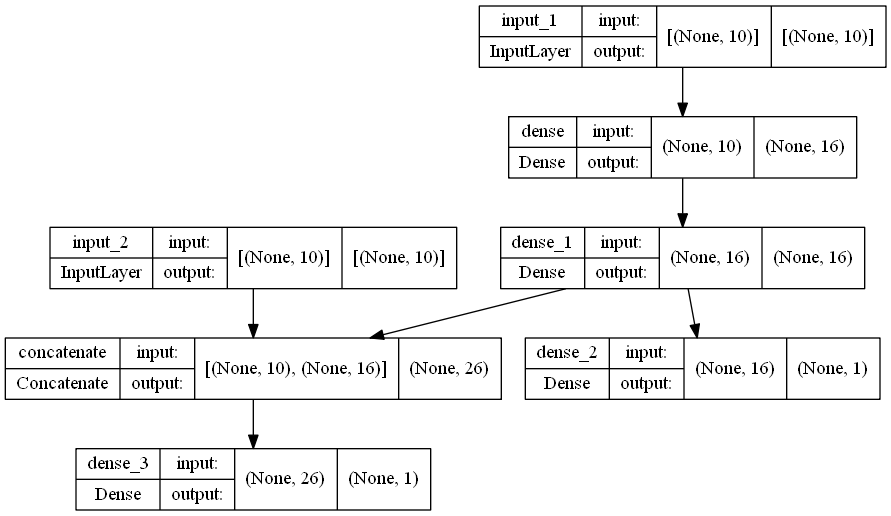

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, concatenate
from tensorflow.keras.utils import plot_model
input_A=Input(shape=[10])
input_B=Input(shape=[10])
h1=Dense(16,activation='relu')(input_A)
h2=Dense(16,activation='relu')(h1)
concat=concatenate([input_B,h2])
out1=Dense(1)(h2)
out2=Dense(1)(concat)
model=Model(inputs=[input_A,input_B],outputs=[out1,out2])
model.summary()
plot_model(model,show_shapes=True)

In [5]:
model.layers

In [6]:
# 초기치 모수 보여줌(랜덤임)
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()
print(weights.shape,weights)
print(biases.shape,biases)

(10, 16) [[-0.04639876  0.19028544 -0.38488755  0.21805882 -0.14663824 -0.3361165
   0.01059461  0.33110565 -0.31903428 -0.02238229 -0.06811756 -0.44226104
   0.28374517 -0.27998817  0.00266585 -0.23366709]
 [-0.11497799  0.48015893  0.2958908  -0.034706   -0.31776112 -0.27891433
  -0.09336501  0.1293608  -0.3185551   0.17484868  0.06417572 -0.1343694
  -0.06354073 -0.43661377 -0.27453744 -0.38143966]
 [ 0.22212791  0.2554506   0.4782213   0.02218783  0.18084168  0.10587931
   0.33229947 -0.30031323  0.15265626  0.11852086 -0.32076922  0.33274007
   0.2757389   0.07079947 -0.12219939  0.35629255]
 [ 0.36586428 -0.1857889   0.2983119  -0.35848275 -0.30053717  0.14805377
  -0.3923884  -0.06559727 -0.18678936 -0.15838951  0.2321145  -0.30881983
   0.45550525 -0.40013045  0.44290286 -0.2271668 ]
 [-0.3549739   0.09333056 -0.37691367  0.22474784 -0.22533119 -0.33540225
   0.11474824 -0.19266054  0.1666187   0.27709907 -0.44985077 -0.31211734
   0.3157124  -0.42348891 -0.11570391  0.18918091

In [7]:
model.compile(loss=['mse','mse'],loss_weights=[0.2,0.8], optimizer='RMSprop')
history=model.fit([x_train1,x_train2],[y_train,y_train],epochs=10, batch_size=32, validation_data=([x_test1,x_test2],[y_test,y_test]))

Epoch 1/10
13/13 [==============================] - 2s 88ms/step - loss: 46646.5410 - dense_3_loss: 1495.5573 - dense_4_loss: 57934.2891 - val_loss: 34630.0938 - val_dense_3_loss: 1326.8047 - val_dense_4_loss: 42955.9180
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 29430.6413 - dense_3_loss: 1037.9561 - dense_4_loss: 36528.8092 - val_loss: 22120.5117 - val_dense_3_loss: 844.7558 - val_dense_4_loss: 27439.4492
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 18060.7334 - dense_3_loss: 620.0679 - dense_4_loss: 22420.8993 - val_loss: 12843.6445 - val_dense_3_loss: 485.1554 - val_dense_4_loss: 15933.2656
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 10338.9333 - dense_3_loss: 366.1052 - dense_4_loss: 12832.1401 - val_loss: 6452.3687 - val_dense_3_loss: 276.6200 - val_dense_4_loss: 7996.3057
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 4871.5857 - dense_3_loss: 235.6059 - dense_4_loss: 603

In [8]:
hidden2=model.layers[1]
weights,biases=hidden2.get_weights()
print(weights,biases)

[[ 0.28197294  0.07775491  0.35624498  0.4100376  -0.29402632  0.37440178
  -0.04717138  0.09369814 -0.49904364 -0.05671253 -0.3796206  -0.1540556
   0.44298247 -0.08122091  0.28841215 -0.40191618]
 [ 0.0020223   0.15028454 -0.16491604  0.00710595 -0.32122117  0.02562315
   0.46923763  0.37945494  0.0749508   0.13005939 -0.1598837  -0.4748096
   0.5326922  -0.06059676  0.18515843 -0.52059793]
 [ 0.09699535  0.45055747 -0.3819821  -0.34944728  0.18567115 -0.05326911
  -0.00268448  0.32618684 -0.2421613  -0.28946888 -0.3960692   0.2446487
   0.21153358  0.16566378  0.03201658 -0.21110694]
 [-0.02690977 -0.21322568  0.41421854 -0.10460854  0.1911819  -0.48165402
   0.39037326  0.46898237 -0.35950378  0.54608655 -0.3005113   0.2849686
   0.22094226 -0.28465652  0.24713385  0.13757528]
 [-0.38196558  0.29201794 -0.06006122  0.5057415  -0.34714848 -0.5548535
   0.3227871   0.18701935 -0.04988625  0.36627048  0.08942659  0.22987318
  -0.08378971 -0.00274344  0.4406712   0.35578573]
 [ 0.45970

## Subclassing API

In [9]:
import tensorflow as tf
class TinoutModel(tf.keras.models.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.h1=Dense(units,activation=activation)
        self.h2=Dense(units,activation=activation)
        self.out1=Dense(1)
        self.out2=Dense(1)
        
    def call(self,inputs):
        input_A,input_B=inputs
        h1=self.h1(input_A)
        h2=self.h2(h1)
        concat=concatenate([input_B,h2])
        out1=self.out1(h2)
        out2=self.out2(concat)
        return out1,out2

model=TinoutModel(units=16)

In [10]:
model.compile(loss=['mse','mse'],loss_weights=[0.2,0.8], optimizer='RMSprop')
history=model.fit([x_train1,x_train2],[y_train,y_train],epochs=20, batch_size=32, validation_data=([x_test1,x_test2],[y_test,y_test]))

Epoch 1/20
13/13 [==============================] - 1s 20ms/step - loss: 11970.9403 - output_1_loss: 8038.4992 - output_2_loss: 12954.0495 - val_loss: 5717.2163 - val_output_1_loss: 7665.7686 - val_output_2_loss: 5230.0776
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 4344.7735 - output_1_loss: 6773.9940 - output_2_loss: 3737.4684 - val_loss: 2260.9131 - val_output_1_loss: 5015.1855 - val_output_2_loss: 1572.3451
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 1719.6512 - output_1_loss: 3944.1358 - output_2_loss: 1163.5300 - val_loss: 775.9865 - val_output_1_loss: 2142.1597 - val_output_2_loss: 434.4432
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 607.0399 - output_1_loss: 1632.8738 - output_2_loss: 350.5813 - val_loss: 269.5794 - val_output_1_loss: 636.4233 - val_output_2_loss: 177.8685
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 267.8278 - output_1_loss: 452.4541 - output_2_loss: 

In [11]:
model.summary()

Model: "tinout_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  176       
_________________________________________________________________
dense_6 (Dense)              multiple                  272       
_________________________________________________________________
dense_7 (Dense)              multiple                  17        
_________________________________________________________________
dense_8 (Dense)              multiple                  27        
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


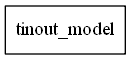

In [12]:
plot_model(model,show_shapes=True)